# Visualize stimulations and check for EPSPs

In [5]:
# imports
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

warnings.simplefilter("ignore", UserWarning)
import nelpy as nel  
import nelpy.plotting as npl

import jagular as jag

In [8]:
# change as needed
files = ['/home/kaylavokt/Desktop/Whrath/Feb14_2/test20220214_163334.rec']

# generate the jagular file map
jfm = jag.io.JagularFileMap(files)

ch_per_elec = 4
tt = 0

#########################################################################
# extraction parameters
max_gap_size = 10000 # maximum number of samples to interpolate
ts_out = os.path.splitext(files[0])[0] + '-timestamps.raw' # output file, customize as needed
ch_out_prefix = os.path.splitext(files[0])[0] + '.' # customize as needed

start_ch = tt*ch_per_elec
end_ch = start_ch + ch_per_elec
subset = list(np.arange(start_ch, end_ch)) # which channels to extract. here these are the channels from tetrode #2
block_size = 2**21 # controls how much data to read at a time
verbose = False # whether to print extra stuff. right now it's not terribly informative
###########################################################################

jag.utils.extract_channels(
    jfm=jfm,
    max_gap_size=max_gap_size,
    ts_out=ts_out,
    ch_out_prefix=ch_out_prefix,
#     subset=subset,
    block_size=block_size,
    verbose=True
)

processing block 0
processing block 1
processing block 2
all timestamps OK


In [3]:
%matplotlib inline

In [8]:
# Shay's plot settings
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font='Universalis ADF Std', font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':33, 'legend.fontsize': 20, 'ytick.labelsize': 10, 'xtick.labelsize': 10}))

In [4]:
prefix = "/home/shayok/Documents/Data/myRodents/Woodrow/3-30-19/"
filename = "NOT1.rec"
os.system("mkdir " + prefix + "channels")

256

In [5]:
# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)

In [6]:
jfm,jfm.duration_wo_gaps,jfm.timestamps,jfm.durations

(<JagularFileMap[SpikeGadgetsRecFileReader]: 1 file spanning 5:36:584 minutes> at 0x7f12983e7f28,
 5:36:584 minutes,
 array([[3654.432     , 3991.01596667]]),
 5:36:584 minutes)

In [7]:
# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'channels/',
                           subset=[4,5,6,7,8,9,10,11,12,13,14,15])

In [8]:
timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
# t1 = np.fromfile(prefix + "channels/ch.12.raw", dtype = np.int16)
# t2 = np.fromfile(prefix + "channels/ch.13.raw", dtype = np.int16)
t2 = nel.AnalogSignalArray([np.fromfile(prefix + "channels/ch.04.raw", dtype = np.int16)*0.195,\
                            np.fromfile(prefix + "channels/ch.05.raw", dtype = np.int16)*0.195,\
                            np.fromfile(prefix + "channels/ch.06.raw", dtype = np.int16)*0.195,\
                            np.fromfile(prefix + "channels/ch.07.raw", dtype = np.int16)*0.195],timestamps=(timestamps-timestamps[0])/30000)
t2._ordinate.base_unit='uV'
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "channels/ch.08.raw", dtype = np.int16)*0.195,\
                            np.fromfile(prefix + "channels/ch.09.raw", dtype = np.int16)*0.195,\
                            np.fromfile(prefix + "channels/ch.10.raw", dtype = np.int16)*0.195,\
                            np.fromfile(prefix + "channels/ch.11.raw", dtype = np.int16)*0.195],timestamps=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'
t4 = nel.AnalogSignalArray([np.fromfile(prefix + "channels/ch.12.raw", dtype = np.int16)*0.195,\
                            np.fromfile(prefix + "channels/ch.13.raw", dtype = np.int16)*0.195,\
                            np.fromfile(prefix + "channels/ch.14.raw", dtype = np.int16)*0.195,\
                            np.fromfile(prefix + "channels/ch.15.raw", dtype = np.int16)*0.195],timestamps=(timestamps-timestamps[0])/30000)
t4._ordinate.base_unit='uV'

# Exploring disruption suppression 

In [14]:
timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
asa = nel.AnalogSignalArray(np.fromfile(prefix+"channels/ch.09.raw",dtype=np.int16)*0.195,timestamps=(timestamps-timestamps[0])/30000)
asa._ordinate.base_unit='uV'
asa.add_signal(nel.filtering.sosfiltfilt(asa[:,0],fl=6,fh=12,gpass=0.01,gstop=60,fs=30000),label='Theta')
asa.add_signal(nel.filtering.sosfiltfilt(asa[:,0],fl=30,fh=50,gpass=0.01,gstop=60,fs=30000),label='SlowGamma')
asa.add_signal(nel.filtering.sosfiltfilt(asa[:,0],fl=61,fh=100,gpass=0.01,gstop=60,fs=30000),label='FastGamma')
asa.add_signal(nel.filtering.sosfiltfilt(asa[:,0],fl=150,fh=250,gpass=0.01,gstop=60,fs=30000),label='Ripple')

<AnalogSignalArray at 0x7f2ec61140b8: 5 signals> for a total of 5:36:584 minutes

In [24]:
# t1LFP = nel.filtering.sosfiltfilt(t1,fl=1,fh=400,gpass=0.1,gstop=30,fs=30000)
t2LFP = nel.filtering.sosfiltfilt(t2,fl=1,fh=400,gpass=0.1,gstop=30,fs=30000)
t3LFP = nel.filtering.sosfiltfilt(t3,fl=1,fh=400,gpass=0.1,gstop=30,fs=30000)
t4LFP = nel.filtering.sosfiltfilt(t4,fl=1,fh=400,gpass=0.1,gstop=30,fs=30000)

NameError: name 't2' is not defined

In [9]:
%matplotlib notebook

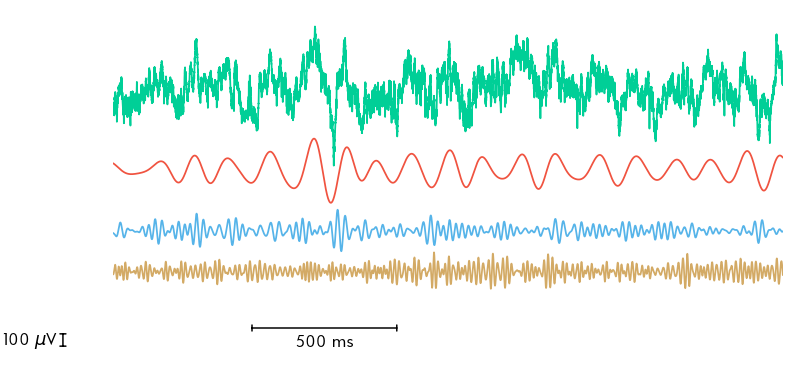

In [21]:
ax = plt.gca()
npl.plot(asa[:,0])
npl.plot(asa[:,1]-1000)
npl.plot(asa[:,2]-1750)
npl.plot(asa[:,3]-2250)

npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)

npl.scalebar.add_scalebar(ax=ax, sizey=200, labely='100 $\mu$V',  pad=0, loc=3,bbox_to_anchor=(0,20))
npl.scalebar.add_scalebar(ax=ax, sizex=0.5,labelx='500 ms', pad=0, loc=3,bbox_to_anchor=(250,20))

ax.set_xlim(63.5,65.75)
ax.set_ylim(-3000,1000)
plt.savefig("/home/shayok/Documents/Posters/UTLearningMemory2019/thetaGammaExample.svg",bbox='tight')

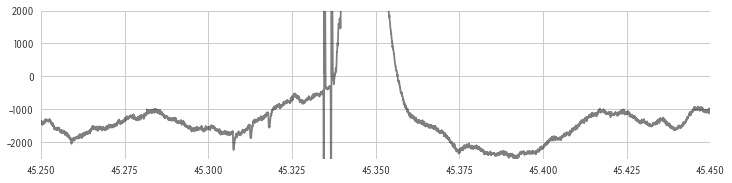

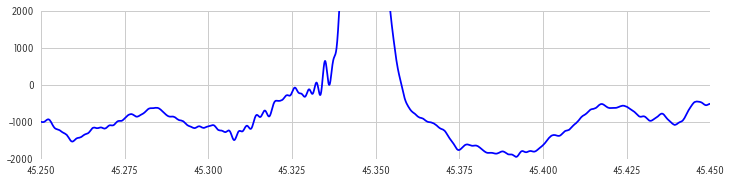

In [106]:
# %matplotlib inline
ax1 = plt.subplot(211,frameon=False)
ax1.plot(timestamps/30000-(timestamps[0]/30000),t1,color='black',alpha=0.5)
ax1.set_xlim(45.25,45.45)
ax1.set_ylim(-2500,2000)
plt.grid(True)
# ax1.axes.get_xaxis().set_ticks([])
plt.show()
ax2 = plt.subplot(2,1,2,sharex=ax1,frameon=False)
ax2.plot(timestamps/30000-(timestamps[0]/30000),t1LFP,color='blue')
ax2.set_xlim(45.25,45.45)
ax2.set_ylim(-2000,2000)
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


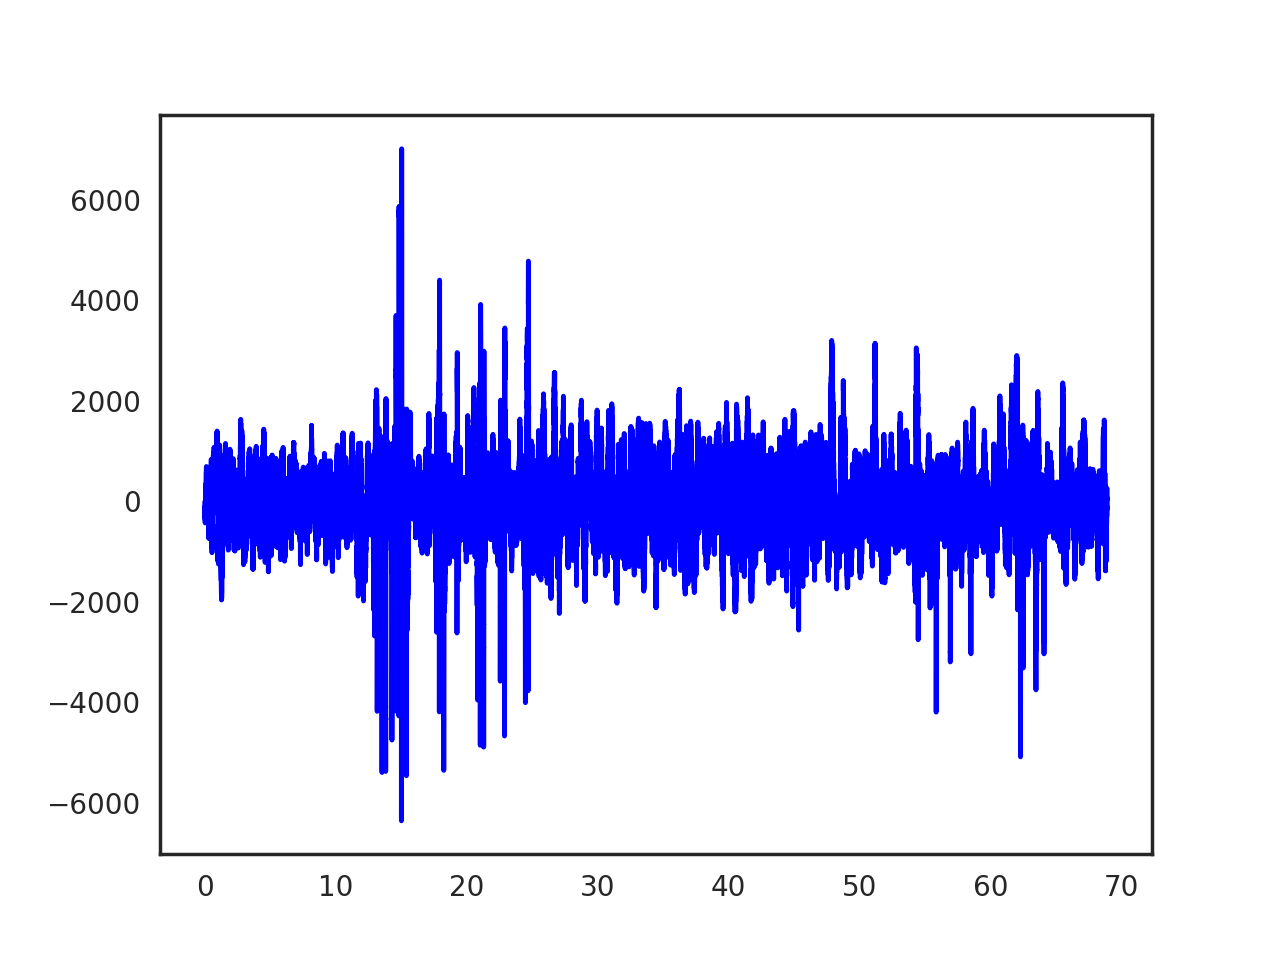

In [9]:
%matplotlib notebook
plt.plot(timestamps/30000-(timestamps[0]/30000),t2,color='blue')
# plt.plot(timestamps/30000-(timestamps[0]/30000),t2LFP,color='black')

(-3000, 1000)

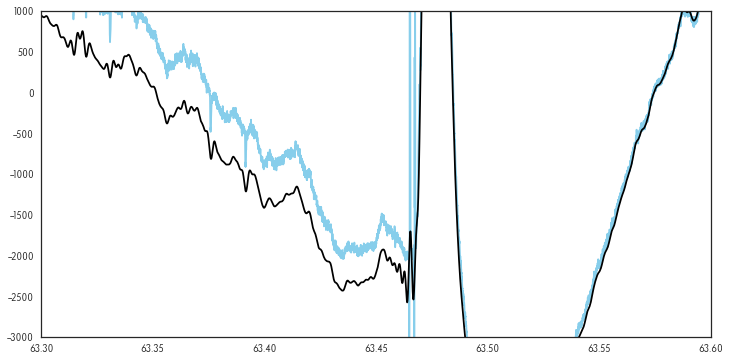

In [122]:
plt.plot(timestamps/30000-(timestamps[0]/30000),t1,color='skyblue')
plt.plot(timestamps/30000-(timestamps[0]/30000),t1LFP,color='black')
plt.xlim(63.3,63.6)
plt.ylim(-3000,1000)

In [9]:
asa = nel.AnalogSignalArray(data=[t1,t2,t3],timestamps=timestamps/30000)

/home/shayok/Documents/Code/nelpy/nelpy/core/_analogsignalarray.py:236: UserWarning: fs was not specified, so we try to estimate it from the data...
/home/shayok/Documents/Code/nelpy/nelpy/core/_analogsignalarray.py:238: UserWarning: fs was estimated to be 30000.00007574272 Hz
/home/shayok/Documents/Code/nelpy/nelpy/core/_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!


In [10]:
bounds,maxes,events = nel.utils.get_events_boundaries(t2,
                        PrimaryThreshold=10000)

In [11]:
stimEpochs = nel.EpochArray(asa.abscissa_vals[bounds])

In [12]:
asa._ordinate.base_unit = 'uV'

In [17]:
stimEpochs

<EpochArray at 0x7fec34f88278: 529 epochs> of length 436.1 milliseconds

In [14]:
stimEpochs[10]

<EpochArray at 0x7fec347127b8: 1 epoch> of length 0.3 milliseconds

In [56]:
stimEpochs[521].data

array([[1285.39806667, 1285.39843333]])

/home/shayok/Documents/Code/nelpy/nelpy/core/_analogsignalarray.py:862: UserWarning: ignoring signal outside of support


(-2500, 2500)

/home/shayok/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Universalis ADF Cd Std'] not found. Falling back to DejaVu Sans


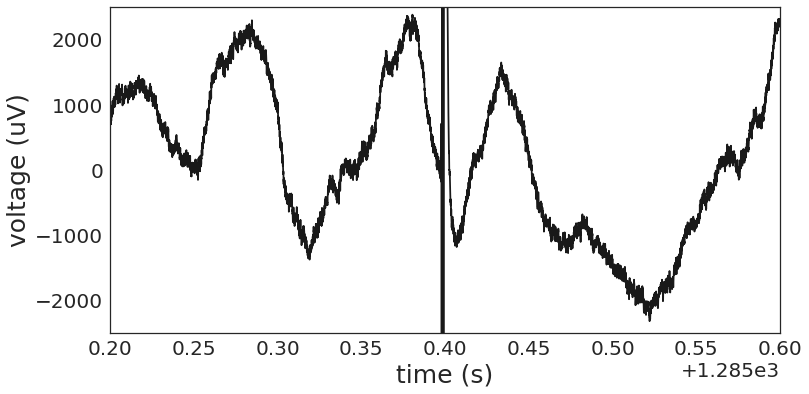

In [58]:
ax = plt.gca()
# npl.plot(asa[:,1][nel.EpochArray(1284,1287)],color=npl.colors.cows.jersey)
# npl.plot(asa[:,1][nel.EpochArray(1284,1285)],color='blue')
npl.plot(asa[:,2][nel.EpochArray(1284,1287)],)
ax.set_xlim(1285.2,1285.6)
ax.set_ylim(-2500,2500)

# Generate MUA figure

In [11]:
from functools import reduce
# Old spike detection across tetrodes function I wrote...
def tetrodeSpikeDetection(tetrodeData,*, thresh=None, lockoutTime=0.001, samplingRate=None):
    '''
    Inputs: 
        tetrodeData - expected np array 4xn
        thresh - expected np array 4x_
        lockoutTime - how long to lock out after spike detection
        samplingRate - sampling rate of tetrodeData
    Output: 
        np array of spike time indexes
    '''
   
    if(samplingRate == None):
        raise AttributeError("samplingRate must be specified!")
        
    #if threshold hasn't been specified find it based on formula from
    #https://vis.caltech.edu/~rodri/papers/Spike_sorting.pdf
    if(thresh == None):
        stdEstimate = np.median(np.absolute(tetrodeData)/0.6745,axis=1)
        thresh = 3*stdEstimate
    #initialize spikes and find threshold crossings for all channels in tetrode
    spikes = []
    for i in range (0,4):
        spikes.append(np.where(tetrodeData[i,:] > thresh[i]))
    spikes = np.asarray(spikes)
    spikes = np.squeeze(spikes)
    
    #merge all channels
    spikes = reduce(np.union1d,((spikes)))
    #remove spikes that are within lockout period
    removeIdx = [] 
    index = 1
    while(index != spikes.shape[0]):
        if((spikes[index]/samplingRate) - (spikes[index-1]/samplingRate) < lockoutTime):
            removeIdx.append(index)
        index+=1
    
    return np.delete(spikes, removeIdx)
import scipy.signal as signal
from math import log10, ceil
def approx_number_of_taps(fs, delta_f, delta1=None, delta2=None, verbose=False):
    """Docstring goes here.
    http://dsp.stackexchange.com/questions/31066/how-many-taps-does-an-fir-filter-need
    Parameters
    ----------
    fs : float
        Sampling frequency (Hz)
    delta_f : float
        transition width; difference between end of pass band and start
        of stop band, in Hz
    delta1 : float, optional (default is 1% ==> 0.01 ==> 10e-3)
        ripple in passband
    delta2 : float, optional (default is -30 dB ==> 10e-3)
        suppression in the stopband
    Returns
    -------
    numtaps : int
        number of FIR filter taps
    """
    if delta1 is None:
        delta1 = 10e-3
    if delta2 is None:
        delta2 = 10e-3

    numtaps = ceil(2*log10(1/(10*delta1*delta2))*fs/delta_f/3)
    if verbose:
        print("Number of filter taps: {}".format(numtaps))
    return numtaps

def bandpass_filter(data, lowcut=None, highcut=None, *, numtaps=None,
                    fs=None):
    """Band filter data using a zero phase FIR filter (filtfilt).
    Parameters
    ----------
    data : AnalogSignalArray, ndarray, or list
    lowcut : float, optional (default 1 Hz)
        Lower cut-off frequency
    highcut : float, optional (default 600 Hz)
        Upper cut-off frequency
    numtaps : int, optional (default 25)
        Number of filter taps
    fs : float, optional if AnalogSignalArray is passed
        Sampling frequency (Hz)
    Returns
    -------
    filtered : same type as data
    """

    if numtaps is None:
        numtaps = 25
    if lowcut is None:
        lowcut = 1
    if highcut is None:
        highcut = 600

    if isinstance(data, (np.ndarray, list)):
        if fs is None:
            raise ValueError("sampling frequency must be specified!")
        # Generate filter for detection
        b = signal.firwin(numtaps=numtaps,
                   cutoff=[lowcut/(fs/2), highcut/(fs/2)],
                   pass_zero=False)
        # Filter raw data to get ripple data
        ripple_data = filtfilt(b, 1, data)
        return ripple_data
    elif isinstance(data, nel.AnalogSignalArray):
        if fs is None:
            fs = data.fs
            warnings.warn("no sampling frequency provided,"
                " using fs={} Hz from AnalogSignalArray".format(fs))
        # Generate filter for detection
        b = signal.firwin(numtaps=numtaps,
                   cutoff=[lowcut/(fs/2), highcut/(fs/2)],
                   pass_zero=False)
        # Filter raw data to get ripple data
        ripple_data = signal.filtfilt(b,1,data.ydata)
        # Return a copy of the AnalogSignalArray with the filtered data
        filtered_analogsignalarray = data.copy()
        filtered_analogsignalarray._ydata = ripple_data
        return filtered_analogsignalarray
    else:
        raise TypeError(
          "Unknown data type {} to filter.".format(str(type(data))))

## Disruption

In [15]:
%matplotlib inline

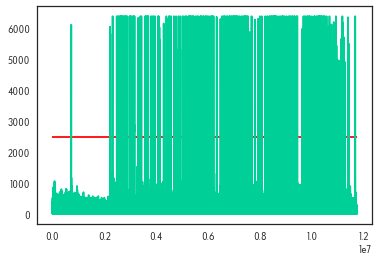

In [16]:
# get all ripple epochs
# 20k looks like a good threshold to use
data = np.abs(t4[:,0].data.squeeze())
stimulationRemovalThreshold = 2500
plt.plot(data)
plt.hlines(stimulationRemovalThreshold,xmin=0,xmax=len(data),color='red')
plt.show()

In [17]:
# let's find the maxes so we have stim epoch windows
bounds,maxes,_ = nel.utils.get_events_boundaries(data,PrimaryThreshold=stimulationRemovalThreshold)
maxtimes = []
[maxtimes.append(np.where(data==maximum)[0][0]) for maximum in maxes]
maxtimes = np.asarray(maxtimes)/30000
allStimBlocks = np.sort(np.append(maxtimes-0.001,maxtimes+0.015))
stimWindows = nel.EpochArray(allStimBlocks.reshape(int(len(allStimBlocks)/2),2).squeeze())
# stimWindows = nel.EpochArray(bounds/30000)
stimWindows = stimWindows.merge(gap=0.001)
removeStimEpochs = stimWindows.complement(t4.support)

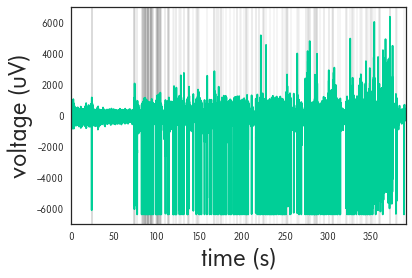

In [18]:
npl.plot(t4[:,0])
npl.epochplot(stimWindows)
plt.show()

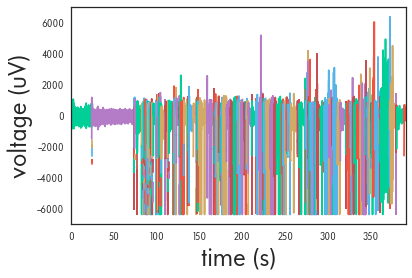

In [19]:
npl.plot(t4[:,0][stimWindows.complement(t4.support)])

In [20]:
t2SpikeBand = bandpass_filter(t2[removeStimEpochs],lowcut=600, highcut=6000, numtaps=approx_number_of_taps(t2.fs,delta_f=20))
t3SpikeBand = bandpass_filter(t3[removeStimEpochs],lowcut=600, highcut=6000, numtaps=approx_number_of_taps(t3.fs,delta_f=20))
t4SpikeBand = bandpass_filter(t4[removeStimEpochs],lowcut=600, highcut=6000, numtaps=approx_number_of_taps(t4.fs,delta_f=20))

/home/shayok/anaconda3/envs/python35/lib/python3.5/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/shayok/anaconda3/envs/python35/lib/python3.5/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/shayok/anaconda3/envs/python35/lib/python3.5/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be in

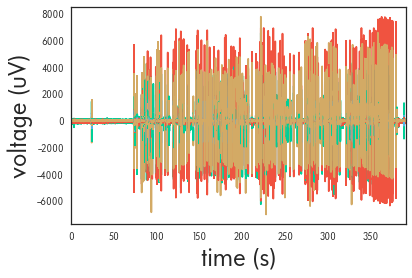

In [21]:
npl.plot(t4SpikeBand)

In [22]:
starttime = t4.time[0]
endtime = t4.time[-1]
spikeTimeIndexes = []
# for i in range(0,5):
#     print("Processing Tetrode {}: Channels: {} to {}".format(i+1, i*4+1, (i*4)+4))
#     spikeTimeIndexes.append(tetrodeSpikeDetection(spikebandfiltered_stim_artifact_removed[:, i*4:(i*4)+4].ydata, \
#                                                   samplingRate=spikebandfiltered.fs))
spikeTimeIndexes = [tetrodeSpikeDetection(t4SpikeBand[nel.EpochArray([starttime,endtime])].data,samplingRate=t4SpikeBand.fs)]
spikeTimeIndexes.append(tetrodeSpikeDetection(t2SpikeBand[nel.EpochArray([starttime,endtime])].data,samplingRate=t4SpikeBand.fs))
spikeTimeIndexes.append(tetrodeSpikeDetection(t3SpikeBand[nel.EpochArray([starttime,endtime])].data,samplingRate=t4SpikeBand.fs))
spikeTimeIndexes = np.asarray(spikeTimeIndexes)
spikeTimeIndexes = np.squeeze(spikeTimeIndexes)
spikeTimeIndexes = reduce(np.union1d,((spikeTimeIndexes)))

#Load up spikes into nelpy!
sta = nel.SpikeTrainArray(t4SpikeBand[nel.EpochArray(starttime,endtime)].time[spikeTimeIndexes],)
binsize = 0.005 # seconds
binnedEpochSpikes = sta.bin(ds=binsize)
binnedEpochSpikesCounts = binnedEpochSpikes.data

(0.0, 390.89593333333335)

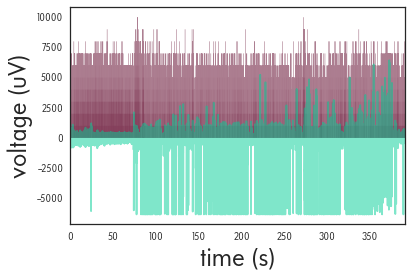

In [23]:
ax=plt.gca()
# #LFP
# npl.plot(asa[:,3],color=npl.colors.cows.jersey)

# #ripple band power
# ax = npl.plot(asa_stim_pulse_removed[:,1],color=npl.colors.cows.holstein)
npl.plot(t4[:,0][nel.EpochArray([starttime,endtime])],alpha=0.5)

#Averaged multi-unit firing across SWRs
plt.fill_between(binnedEpochSpikes.bin_centers,binnedEpochSpikes.data.squeeze()*1000,step='pre',\
                 color=npl.colors.cows.texas_aggie,alpha=0.5)

#power signal
# npl.plot(asa_stim_pulse_removed[:,-1],color=npl.colors.cows.texas_aggie)

# ax.set_xlim(148.7,149.5)
ax.set_xlim()
# ax.set_ylim(-4000,4000)
# ax.legend([],bbox_to_anchor=(1,1),loc=1)

In [24]:
allStimBlocks_forRipplesEpochs = np.sort(np.append(maxtimes,maxtimes+0.015))
stimWindows_forRipplesEpochs = nel.EpochArray(allStimBlocks_forRipplesEpochs.reshape(int(len(allStimBlocks_forRipplesEpochs)/2),2).squeeze())

In [25]:
rippleEpochs = stimWindows_forRipplesEpochs[nel.EpochArray([starttime,endtime])].expand(amount=0.15,direction='start')
rippleEpochs._data[:,1]=rippleEpochs.data[:,0]+0.35
# rippleEpochs = rippleEpochs[0:525]
rippleEpochs = rippleEpochs[0:5]+rippleEpochs[6:8]+rippleEpochs[9:11]+rippleEpochs[12:15]+rippleEpochs[16]+\
               rippleEpochs[18:23]+rippleEpochs[24:37]+rippleEpochs[38:47]+rippleEpochs[48]+rippleEpochs[50:61]+\
               rippleEpochs[62]+rippleEpochs[64:-1]
rippleSpikingData = [(sta[ripplingepoch].bin(ds=binsize).data) for ripplingepoch in rippleEpochs]
lengths = [(len(spikings.squeeze())) for spikings in rippleSpikingData];
rippleSpikingData = [spikings[0][0:min(lengths)] for spikings in rippleSpikingData]
rippleSpikingData = np.asarray(rippleSpikingData)

In [26]:
[print(i,epoch.data,epoch.duration) for i,epoch in enumerate(rippleEpochs)];

0 [[24.0682 24.4182]] 350.0 milliseconds
1 [[24.06873333 24.41873333]] 350.0 milliseconds
2 [[24.0759 24.4259]] 350.0 milliseconds
3 [[24.07896667 24.42896667]] 350.0 milliseconds
4 [[24.0835 24.4335]] 350.0 milliseconds
5 [[24.09353333 24.44353333]] 350.0 milliseconds
6 [[73.93796667 74.28796667]] 350.0 milliseconds
7 [[73.94903333 74.29903333]] 350.0 milliseconds
8 [[73.95346667 74.30346667]] 350.0 milliseconds
9 [[74.17893333 74.52893333]] 350.0 milliseconds
10 [[74.17943333 74.52943333]] 350.0 milliseconds
11 [[74.19393333 74.54393333]] 350.0 milliseconds
12 [[77.18593333 77.53593333]] 350.0 milliseconds
13 [[77.18593333 77.53593333]] 350.0 milliseconds
14 [[77.18593333 77.53593333]] 350.0 milliseconds
15 [[77.18593333 77.53593333]] 350.0 milliseconds
16 [[77.18593333 77.53593333]] 350.0 milliseconds
17 [[77.18593333 77.53593333]] 350.0 milliseconds
18 [[77.18593333 77.53593333]] 350.0 milliseconds
19 [[77.18593333 77.53593333]] 350.0 milliseconds
20 [[77.18593333 77.53593333]] 350

In [30]:
muaData = rippleSpikingData.mean(axis=0)/binsize
muaData[30] = 0
# muaData[31] = 0
# muaData[32] = 0

In [161]:
%matplotlib inline

42 low latency

(89.4198, 89.76979999999999)

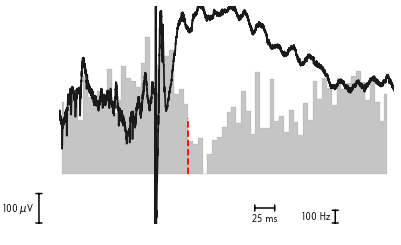

In [63]:
disruptionNum = 230
ax=plt.gca()
npl.plot((t3[:,0][rippleEpochs[disruptionNum]]*0.5)+500,color='0.1')
# npl.plot((t3[:,0][rippleEpochs[disruptionNum]]*0.5).clip(-300,max(t3[:,0][rippleEpochs[disruptionNum]].data.squeeze()*0.5))+500,color='0.1')
# npl.plot(t4LFP[:,1][rippleEpochs[disruptionNum]]*0.5+500)

npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)

npl.scalebar.add_scalebar(ax=ax, sizey=200, labely='100 $\mu$V',  pad=0, loc=3,bbox_to_anchor=(0,20))
npl.scalebar.add_scalebar(ax=ax, sizey=100, labely='100 Hz', pad=0, loc=3,bbox_to_anchor=(300,20))
npl.scalebar.add_scalebar(ax=ax, sizex=0.025,labelx='25 ms', pad=0, loc=3,bbox_to_anchor=(250,20))


# Averaged multi-unit firing across SWRs
plt.fill_between(sta[rippleEpochs[disruptionNum]].bin(ds=binsize).bin_centers[0:min(lengths)],muaData,step='mid',\
                 color='0.1',alpha=0.25)
plt.vlines(sta[rippleEpochs[disruptionNum]].bin(ds=binsize).bin_centers[29-3]+.002,ymin=-5,ymax=330,linestyles='dashed',color='red')
ax.set_ylim(-300,1000)
ax.set_xlim(rippleEpochs[disruptionNum].start,rippleEpochs[disruptionNum].stop)
# plt.savefig("/home/shayok/Documents/Data/myRodents/Woodrow/RippleDisrupted.svg")

# Control Figure

In [92]:
# get all ripple epochs
stimArtifactDetect = 2500
data = np.abs(t4[:,0].data.squeeze())
plt.plot(data)
plt.hlines(stimArtifactDetect,xmin=0,xmax=len(data),color='red')

In [93]:
# let's find the maxes so we have stim epoch windows
bounds,maxes,_ = nel.utils.get_events_boundaries(data,PrimaryThreshold=stimArtifactDetect)
maxtimes = []
[maxtimes.append(np.where(data==maximum)[0][0]) for maximum in maxes]
maxtimes = np.asarray(maxtimes)/30000
maxtimes.shape
allStimBlocks = np.sort(np.append(maxtimes-0.001,maxtimes+0.015))
stimWindows = nel.EpochArray(allStimBlocks.reshape(int(len(allStimBlocks)/2),2).squeeze())
# stimWindows = nel.EpochArray(bounds/30000)
stimWindows = stimWindows.merge(gap=0.001)
removeStimEpochs = stimWindows.complement(t4.support)

<IPython.core.display.Javascript object>


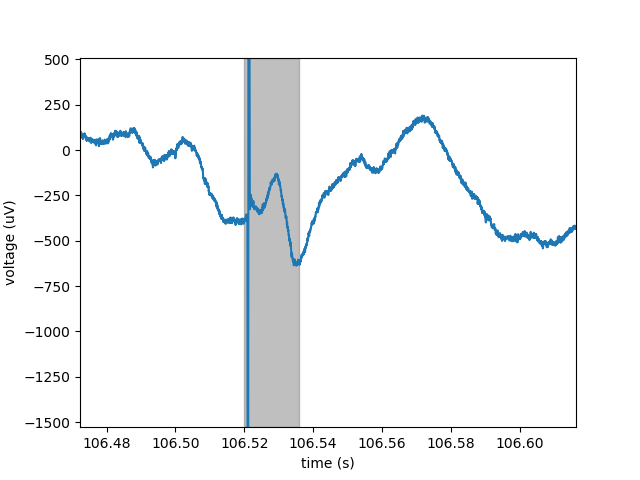

In [16]:
npl.plot(t4[:,0])
npl.epochplot(stimWindows)
plt.show()

<IPython.core.display.Javascript object>


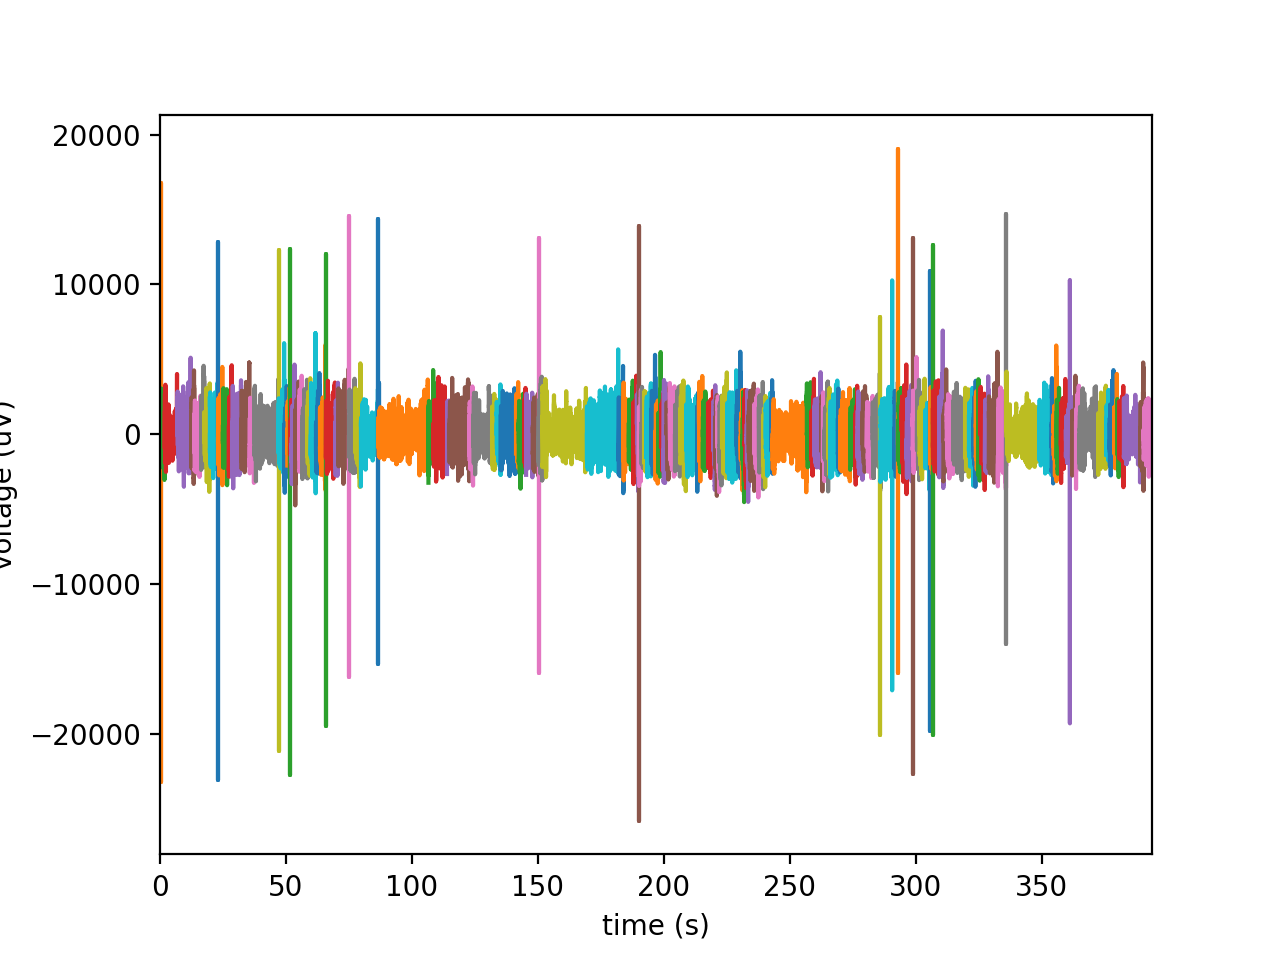

In [12]:
npl.plot(t4[:,0][removeStimEpochs])

In [94]:
t4SpikeBand = bandpass_filter(t4[removeStimEpochs],lowcut=600, highcut=6000, numtaps=approx_number_of_taps(t4.fs,delta_f=20))

/home/shayok/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/shayok/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/shayok/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array

/home/shayok/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/shayok/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/shayok/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array

<IPython.core.display.Javascript object>


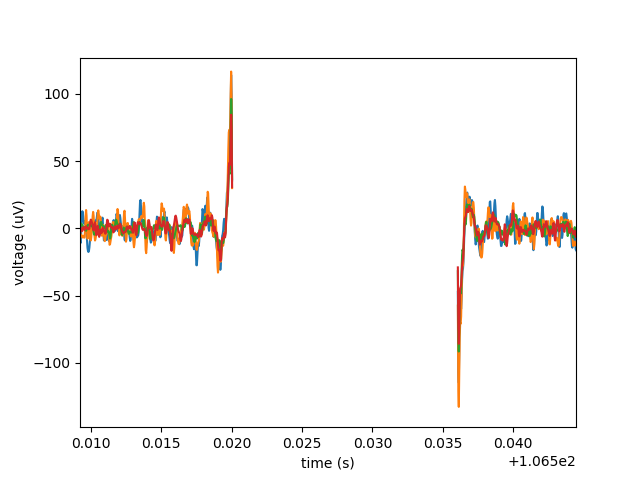

In [17]:
npl.plot(t4SpikeBand)

In [95]:
starttime = t4.time[0]
endtime = t4.time[-1]
spikeTimeIndexes = []
# for i in range(0,5):
#     print("Processing Tetrode {}: Channels: {} to {}".format(i+1, i*4+1, (i*4)+4))
#     spikeTimeIndexes.append(tetrodeSpikeDetection(spikebandfiltered_stim_artifact_removed[:, i*4:(i*4)+4].ydata, \
#                                                   samplingRate=spikebandfiltered.fs))
spikeTimeIndexes = [tetrodeSpikeDetection(t4SpikeBand[nel.EpochArray([starttime,endtime])].data,samplingRate=t4SpikeBand.fs)]
spikeTimeIndexes = np.asarray(spikeTimeIndexes)
spikeTimeIndexes = np.squeeze(spikeTimeIndexes)
spikeTimeIndexes = reduce(np.union1d,((spikeTimeIndexes)))

#Load up spikes into nelpy!
sta = nel.SpikeTrainArray(t4SpikeBand[nel.EpochArray(starttime,endtime)].time[spikeTimeIndexes],)
binsize = 0.005 # seconds
binnedEpochSpikes = sta.bin(ds=binsize)
binnedEpochSpikesCounts = binnedEpochSpikes.data

<IPython.core.display.Javascript object>


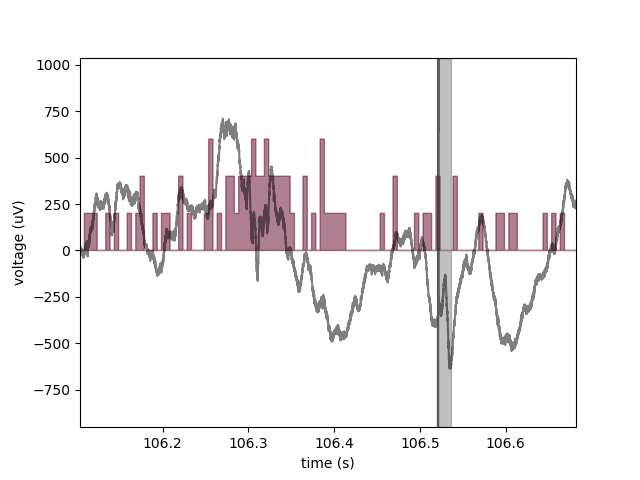

(0.0, 393.6879333333333)

In [21]:
ax=plt.gca()
# #LFP
# npl.plot(asa[:*0.195,3],color=npl.colors.cows.jersey)

# #ripple band power
# ax = npl.plot(asa_stim_pulse_removed[:,1],color=npl.colors.cows.holstein)
npl.plot(t4[:,0][nel.EpochArray([starttime,endtime])],alpha=0.5,color='k')

#Averaged multi-unit firing across SWRs
plt.fill_between(binnedEpochSpikes.bin_centers,binnedEpochSpikes.data.squeeze()/binsize,step='post',\
                 color=npl.colors.cows.texas_aggie,alpha=0.5)

#power signal
# npl.plot(asa_stim_pulse_removed[:,-1],color=npl.colors.cows.texas_aggie)

npl.epochplot(stimWindows)

# ax.set_xlim(148.7,149.5)
ax.set_xlim()
# ax.set_ylim(-4000,4000)
# ax.legend([],bbox_to_anchor=(1,1),loc=1)

In [96]:
rippleEpochs = stimWindows[nel.EpochArray([starttime,endtime])].expand(amount=0.275,direction='start')
rippleEpochs._data[:,1]=rippleEpochs.data[:,0]+0.35
rippleSpikingData = [(sta[ripplingepoch].bin(ds=binsize).data) for ripplingepoch in rippleEpochs]
lengths = [(len(spikings.squeeze())) for spikings in rippleSpikingData];
rippleSpikingData = [spikings[0][0:min(lengths)] for spikings in rippleSpikingData]
rippleSpikingData = np.asarray(rippleSpikingData)

In [97]:
[print(i,epoch.data,epoch.duration) for i,epoch in enumerate(rippleEpochs)];

0 [[0.21203333 0.56203333]] 350.0 milliseconds
1 [[0.22803333 0.57803333]] 350.0 milliseconds
2 [[1.6362 1.9862]] 350.0 milliseconds
3 [[6.6998 7.0498]] 350.0 milliseconds
4 [[12.0927 12.4427]] 350.0 milliseconds
5 [[13.4443 13.7943]] 350.0 milliseconds
6 [[16.012 16.362]] 350.0 milliseconds
7 [[17.24413333 17.59413333]] 350.0 milliseconds
8 [[19.50256667 19.85256667]] 350.0 milliseconds
9 [[22.7404 23.0904]] 350.0 milliseconds
10 [[24.66903333 25.01903333]] 350.0 milliseconds
11 [[27.01273333 27.36273333]] 350.0 milliseconds
12 [[28.39636667 28.74636667]] 350.0 milliseconds
13 [[32.093 32.443]] 350.0 milliseconds
14 [[35.3251 35.6751]] 350.0 milliseconds
15 [[37.17203333 37.52203333]] 350.0 milliseconds
16 [[46.83593333 47.18593333]] 350.0 milliseconds
17 [[49.14856667 49.49856667]] 350.0 milliseconds
18 [[50.2352 50.5852]] 350.0 milliseconds
19 [[51.44493333 51.79493333]] 350.0 milliseconds
20 [[51.46093333 51.81093333]] 350.0 milliseconds
21 [[51.98856667 52.33856667]] 350.0 millise

In [98]:
muaData = rippleSpikingData.mean(axis=0)/binsize
muaData[55] = 0
muaData[54] = 0
# muaData[21] = 0
# muaData[22] = 0

In [117]:
%matplotlib inline

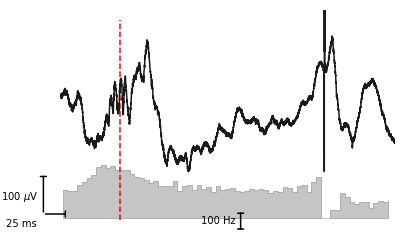

In [122]:
disruptionNum = 110
ax=plt.gca()
npl.plot((t4[:,1][rippleEpochs[disruptionNum]]*0.5).clip(-315,max(t4[:,0][rippleEpochs[disruptionNum]].data.squeeze()*0.5))+550,color='0.1')
# npl.plot(t4LFP[:,1][rippleEpochs[disruptionNum]]*0.5+550)

npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)

npl.scalebar.add_scalebar(ax=ax, sizex=0.025, sizey=200, labely='100 $\mu$V', labelx='25 ms', pad=0, loc=3,bbox_to_anchor=(0,20))
npl.scalebar.add_scalebar(ax=ax, sizey=100, labely='100 Hz', pad=0, loc=3,bbox_to_anchor=(200,20))

# Averaged multi-unit firing across SWRs
plt.fill_between(sta[rippleEpochs[disruptionNum]].bin(ds=binsize).bin_centers[0:min(lengths)],muaData,step='post',\
                 color='0.1',alpha=0.25)
plt.vlines(x=stimWindows[disruptionNum].start-.212,ymin=-10,ymax=1000,linestyles='dashed',color='red')
ax.set_ylim(-350+300,300+750)
ax.set_xlim(rippleEpochs[disruptionNum].start,rippleEpochs[disruptionNum].stop)
plt.savefig("/home/shayok/Documents/Data/myRodents/Woodrow/ControlDisruption.svg")

# ShayQuickPyQt

In [29]:
import numpy as np
from PyQt5 import QtGui  # (the example applies equally well to PySide)
import pyqtgraph as pg
import sys

class EphysViewer(QtGui.QMainWindow):
    
    def __init__(self, flnm = None, parent=None):
        super(EphysViewer, self).__init__(parent=parent)
                
        self.disruptionNum = 0

        self.app = QtGui.QApplication([])
        
        ## Define a top-level widget to hold everything
        self.w = QtGui.QWidget()

        ## Create some widgets to be placed inside
        self.numInc = QtGui.QPushButton('Increment Num')
        self.numDec = QtGui.QPushButton('Decrement Num')
        self.numIncFive = QtGui.QPushButton('Increment by 5')
        self.numDecFive = QtGui.QPushButton('Decrement by 5')
        self.mainWind = pg.PlotWidget()


         #(Row, Column, Row Span=1, Col Span=1)   
            
        #QtGui.QLabel(text)
        ## Create a grid layout to manage the widgets size and position
        self.layout = QtGui.QGridLayout()
        self.buttonLayout = QtGui.QVBoxLayout()
        self.w.setLayout(self.layout)
        #Create labels, buttons, and controls
        self.buttonLayout.addWidget(self.numInc)
        self.buttonLayout.addWidget(self.numDec)
        self.buttonLayout.addWidget(self.numIncFive)   
        self.buttonLayout.addWidget(self.numDecFive)

        self.layout.addLayout(self.buttonLayout,0,0)
        
        #Add main plotting window
        self.layout.addWidget(self.mainWind,0,1)


        
        self.mainWind.sigXRangeChanged.connect(self.updatePlot)

        self.numInc.clicked.connect(self.incNum)
        self.numDec.clicked.connect(self.decNum)
        self.numIncFive.clicked.connect(self.incNumFive)
        self.numDecFive.clicked.connect(self.decNumFive)
        self.updatePlot()
        #self.w.show() ###########
        #self.app.exec_() ############

    
    def updatePlot(self):
        self.mainWind.clear()
        self.mainWind.plot(t4[rippleEpochs[self.disruptionNum]].time, t4[:,0][rippleEpochs[self.disruptionNum]].data.squeeze()*0.195*0.5, pen=pg.mkPen('r', width=1))
        self.mainWind.plot(t4LFP[rippleEpochs[self.disruptionNum]].time, t4[:,0][rippleEpochs[self.disruptionNum]].data.squeeze()*0.195*0.5, pen=pg.mkPen('r', width=1))
        self.mainWind.setTitle('Disruption Number: {}'.format(self.disruptionNum))
        self.mainWind.setXRange(rippleEpochs[self.disruptionNum].start,rippleEpochs[self.disruptionNum].stop)
        self.mainWind.setYRange(-100,100)


    def incNum(self):
        self.disruptionNum+=1
        self.updatePlot()
        
    def decNum(self):
        self.disruptionNum-=1
        self.updatePlot()
        
    def incNumFive(self):
        self.disruptionNum+=5
        self.updatePlot()
        
    def decNumFive(self):
        self.disruptionNum-=5
        self.updatePlot()
    
#ev = EphysViewer('/home/alexr/Documents/Recordings/019-Sierra/SierraSurgeryPostInsert_181212_Rec1.npz')

#btnspkup.clicked.connect(upClick)
#btndown.clicked.connect(downClick)

if __name__ == '__main__':
    app= QtGui.QApplication([])
    ep = EphysViewer()
    ep.w.show()
    ep.app.exec_()
    #self.w.show() ###########
        #self.app.exec_() ############
    #ep.show()
    #sys.exit(app.exec_())